In [92]:
import pandas as pd
mnist_data = pd.read_csv('mnist.csv').values

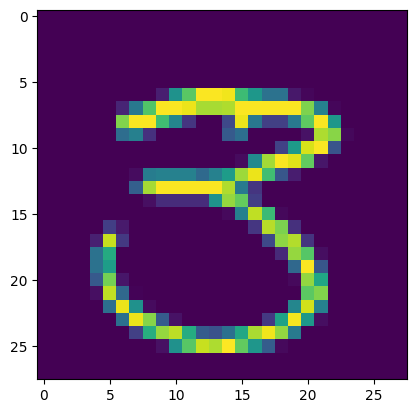

In [93]:
import matplotlib.pyplot as plt
labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]
img_size = 28
plt.imshow(digits[7].reshape(img_size, img_size))
plt.show()

In [94]:
# create ink feature
import numpy as np
ink = np.array([sum(row) for row in digits])
# compute mean for each digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]
# compute standard deviation for each digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]
print(ink_mean,ink_std)

[34632.40755082285, 15188.466268146884, 29871.099353603066, 28320.188002757986, 24232.72249508841, 25835.920421607378, 27734.917331399563, 22931.244262667577, 30184.148412503077, 24553.75] [8461.892043158483, 4409.461697281539, 7653.006198983366, 7574.104535679545, 6374.633457092554, 7526.602988920305, 7530.503187255003, 6168.3408781754315, 7777.396357381105, 6465.231330430596]


In [95]:
from sklearn.preprocessing import scale
ink = scale(ink).reshape(-1, 1) #reshaping arguments for the sake of doing it. 

In [96]:
#Training Linear Model (no splitting of dataset)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(ink,labels)
pred = clf.predict(ink)



In [97]:
clf.score(ink,labels)


0.22680952380952382

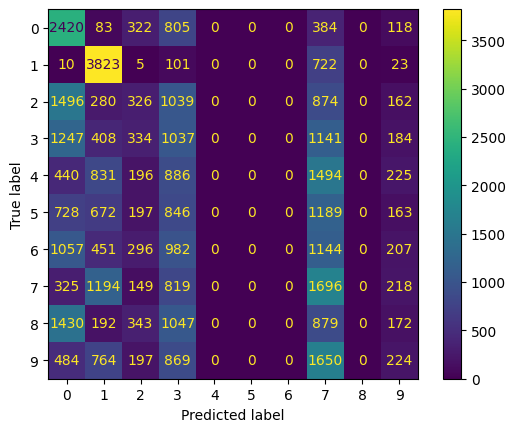

In [98]:
#Confusion Matrix
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(labels, pred, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

In [99]:
ndf = pd.DataFrame({"col1":labels,"col2":pred})
item_counts1 = ndf["col1"].value_counts()
item_counts2 = ndf["col2"].value_counts()

print(item_counts1,item_counts2)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: col1, dtype: int64 7    11173
0     9637
1     8698
3     8431
2     2365
9     1696
Name: col2, dtype: int64


In [100]:
#Adding One more feature (how much ink in the bottom half)
half_length = int(np.sqrt(len(digits[0]))/2)

btm_ink = np.array([sum(row[half_length:]) for row in digits])
top_ink = np.array([sum(row[:half_length]) for row in digits])

btm_ink = scale(btm_ink).reshape(-1, 1) #skale for zero mean and std deviation. 
top_ink = scale(top_ink).reshape(-1, 1)

In [119]:
print(len(btm_ink))
print(len(ink))
features = []
features2 = []
features3 = []


for i in range(0,len(ink)):
    features.append([ink[i][0],btm_ink[i][0]])
    features2.append([(ink[i][0]*100)*(ink[i][0]*100)*(ink[i][0]*100),ink[i][0]])
    features3.append([ink[i][0],btm_ink[i][0],top_ink[i][0]])

print(features,features3)

42000
42000
[[-1.0983437658880075, -1.098341146702777], [2.1194918092303707, 2.119491539581164], [-1.4693846061663212, -1.4693816538765763], [-1.285245231338374, -1.2852424443610433], [2.865716625720627, 2.865715686142862], [-0.36040522126500896, -0.3604032645692781], [-1.0404549499264717, -1.0404523827113314], [-0.2191933381938269, -0.21919150827205366], [0.19880304266561338, 0.1988044973282065], [0.6188709914918681, 0.6188720690355164], [1.8881667196027618, 1.8881666576272755], [-0.019977552051841457, -0.019975900977436286], [-1.5936786841751855, -1.5936756202995612], [1.0953316238591815, 1.0953322736569584], [0.896346011935731, 0.8963468403742354], [-1.991995169349889, -1.9919917478828488], [1.7385534775550548, 1.738553549895905], [0.8085345475646537, 0.8085354548365156], [-1.4665074284346347, -1.466504478727896], [2.0990063037807616, 2.099006052522561], [-0.21297863429338368, -0.21297680995090443], [0.07117143848799243, 0.0711730077327526], [0.2968572597614953, 0.29685862639522786]

In [120]:
print(features3[0])

[-1.0983437658880075, -1.098341146702777, -0.006707801199304286]


In [121]:
clf2 = LogisticRegression(multi_class="multinomial",random_state=0).fit(features,labels)
pred2 = clf2.predict(features)
clf3 = LogisticRegression(multi_class="multinomial",random_state=0).fit(features2,labels)
pred3 = clf3.predict(features2)
clf4 = LogisticRegression(multi_class="multinomial",random_state=0).fit(features3,labels)
pred4 = clf4.predict(features3)
clf2.score(features,labels)



0.22683333333333333

In [122]:
clf3.score(features2,labels)

0.1925952380952381

In [123]:
clf4.score(features3,labels)

0.22685714285714287

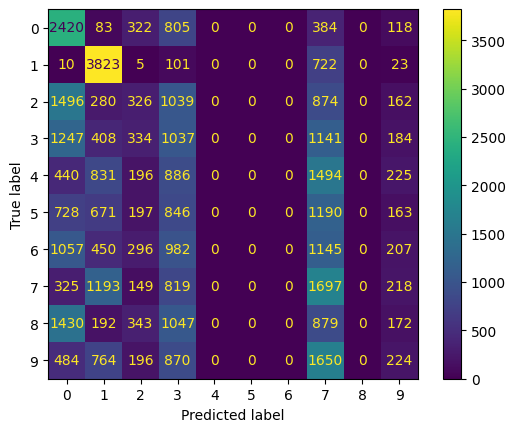

In [118]:
cm = confusion_matrix(labels, pred2, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()
plt.title('Digit Recognition (Bottom Ink feature)')


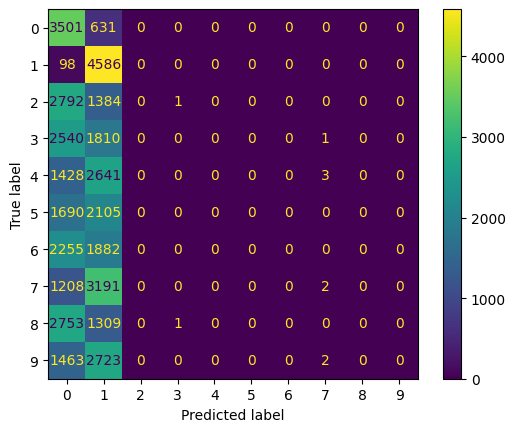

In [124]:
cm = confusion_matrix(labels, pred3, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.title('Digit Recognition (Ink squared + Ink feature)')
plt.show()

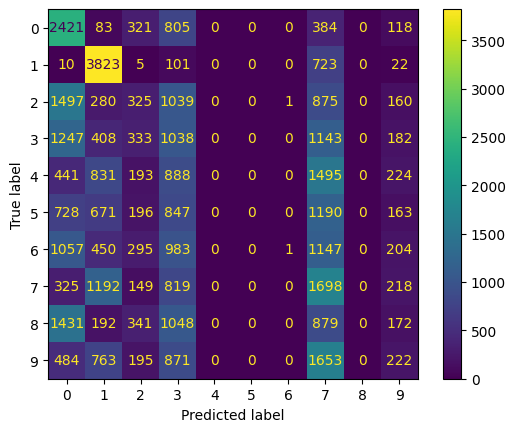

In [108]:
cm = confusion_matrix(labels, pred4, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.title('Digit Recognition (Ink feature)')
plt.show()

In [157]:
x_train, x_test, y_train, y_test = train_test_split(digits, labels, test_size=0.88, random_state=42)

In [158]:
print(x_train,y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [7 1 4 ... 2 6 0]


d:\Programms\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [169]:
totalClf.score(x_test, y_test) #clf3.score(features2,labels)

0.8702110389610389

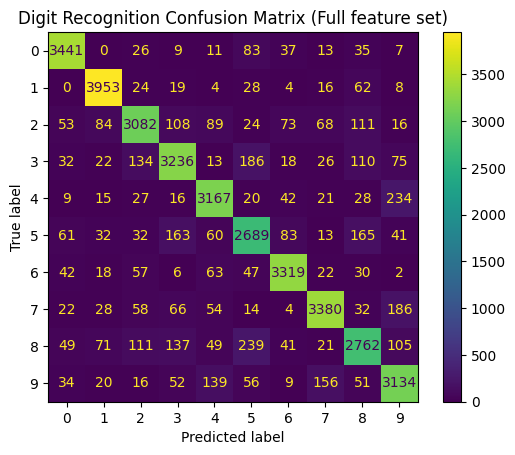

In [170]:
cm = confusion_matrix(y_test, totalPred, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.title('Digit Recognition Confusion Matrix (Full feature set)')
plt.show()